<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## GeostatsPy Well-documented Demonstration Workflows 

### Calculating Variograms

#### Michael Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

This is a tutorial for / demonstration of **Calculating Variograms** with GeostatsPy. 

**YouTube Lecture**: check out my lectures on:
        
* [Variogram Introduction](https://youtu.be/jVRLGOsnYuw?si=RD5exyGl_I_LAl4H)
* [Variogram Calculation](https://youtu.be/mzPLicovE7Q?si=-ZPgFK52h2xp1cER)
* [Variogram Parameters](https://youtu.be/NE4xfhIHAm4?si=dF18zj5_M2yVwxoD)
* [Variogram Directions](https://youtu.be/bryRCrtf3hk?si=058uFy-eTtTqwNPr)
* [Variogram Modeling](https://youtu.be/-Bi63Y3u6TU?si=-kwvFLicNTbg85xL)

For your convenience here's a summary of salient points.
    
#### Spatial Continuity 

**Spatial Continuity** is the correlation between values over distance.

* No spatial continuity – no correlation between values over distance, random values at each location in space regardless of separation distance.

* Homogenous phenomenon have perfect spatial continuity, since all values as the same (or very similar) they are correlated. 

We need a statistic to quantify spatial continuity! A convenient method is the Semivariogram.

#### The Semivariogram

Function of difference over distance.

* The expected (average) squared difference between values separated by a lag distance vector (distance and direction), $h$:

\begin{equation}
\gamma(\bf{h}) = \frac{1}{2 N(\bf{h})} \sum^{N(\bf{h})}_{\alpha=1} (z(\bf{u}_\alpha) - z(\bf{u}_\alpha + \bf{h}))^2  
\end{equation}

where $z(\bf{u}_\alpha)$ and $z(\bf{u}_\alpha + \bf{h})$ are the spatial sample values at tail and head locations of the lag vector respectively.

* Calculated over a suite of lag distances to obtain a continuous function.

* the $\frac{1}{2}$ term converts a variogram into a semivariogram, but in practice the term variogram is used instead of semivariogram.
* We prefer the semivariogram because it relates directly to the covariance function, $C_x(\bf{h})$ and univariate variance, $\sigma^2_x$:

\begin{equation}
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

Note the correlogram is related to the covariance function as:

\begin{equation}
\rho_x(\bf{h}) = \frac{C_x(\bf{h})}{\sigma^2_x}
\end{equation}

The correlogram provides of function of the $\bf{h}-\bf{h}$ scatter plot correlation vs. lag offset $\bf{h}$.  

\begin{equation}
-1.0 \le \rho_x(\bf{h}) \le 1.0
\end{equation}

#### Variogram Observations

The following are common observations for variograms that should assist with their practical use.

##### Observation \#1 - As distance increases, variability increase (in general).

This is common since in general, over greater distance offsets, there is often more difference between the head and tail samples.

In some cases, such as with spatial cyclicity of the hole effect variogram model the variogram may have negative slope over somelag distance intervals

Negative slopes at lag distances greater than half the data extent are often caused by too few pairs for a reliable variogram calculation

##### Observation \#2 - Calculated with over all possible pairs separated by lag vector, $\bf{𝐡}$.

We scan through the entire data set, searching for all possible pair combinations with all other data.  We then calculate the variogram as one half the expectation of squared difference between all pairs.

More pairs results in a more reliable measure.

##### Observation \#3 - Need to plot the sill to know the degree of correlation.

**Sill** is the variance, $\sigma^2_x$

Given stationarity of the variance, $\sigma^2_x$, and variogram $\gamma(\bf{h})$:

we can define the covariance function:

\begin{equation}
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

The covariance measure is a measure of similarity over distance (the mirror image of the variogram as shown by the equation above).

Given a standardized distribution $\sigma^2_x = 1.0$, the covariance, $C_x(\bf{h})$, is equal to the correlogram, $\rho_x(\bf{h})$: 

\begin{equation}
\rho_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

##### Observation \#4 - The lag distance at which the variogram reaches the sill is know as the range.

At the range, knowing the data value at the tail location provides no information about a value at the head location of the lag distance vector.

##### Observation \#5 - The nugget effect, a discontinuity at the origin

Sometimes there is a discontinuity in the variogram at distances less than the minimum data spacing.  This is known as **nugget effect**.

The ratio of nugget / sill, is known as relative nugget effect (%). Modeled as a discontinuity with no correlation structure that at lags, $h \gt \epsilon$, an infinitesimal lag distance, and perfect correlation at $\bf{h} = 0$.
Caution when including nuggect effect in the variogram model as measurement error, mixing populations cause apparent nugget effect

This exercise demonstrates the semivariogram calculation with GeostatsPy. The steps include:

1. generate a 2D model with sequential Gaussian simulation
2. sample from the simulation
3. calculate and visualize experimental semivariograms

#### Detecting Directions of Spatial Continuity

Spatial continuity can be described with nested spatial continuity models:

\begin{equation}
\Gamma_x(\bf{ h }) = \sum_{i=1}^{nst} \gamma_i(\bf{ h })
\end{equation}

where $\Gamma_x(\bf{h})$ is the nested variogram model resulting from the summation of $nst$ nested variograms  $\gamma_i(\bf{h})$.

Each one of these variogram structures, $\gamma_i(\bf{h})$, is based on a geometric anisotropy model parameterized by the orientation and range in the major and minor directions.  In 2D this is simply an azimuth and ranges, $azi$, $a_{maj}$ and $a_{min}$. Note, the range in the minor direction (orthogonal to the major direction.

The geometric anisotropy model assumes that the range in all off-diagonal directions is based on an ellipse with the major and minor axes alligned with and set to the major and minor for the variogram.

\begin{equation}
\bf{ h } _i = \sqrt{\left(\frac{r_{maj}}{a_{maj_i}}\right)^2 + \left(\frac{r_{maj}}{a_{maj_i}}\right)^2}  
\end{equation}

Therefore, if we know the major direction, range in major and minor directions, we may completely describe each nested componnent of the complete spatial continuity of the variable of interest, $i = 1,\dots,nst$.

In this workflow we will explore methods to calculate spatial continuity with GeostatsPy, from a spatial dataset.

#### Load the required libraries

The following code loads the required libraries. 

In [2]:
import geostatspy.GSLIB as GSLIB                              # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                        # GSLIB methods convert to Python      
import geostatspy
print('GeostatsPy version: ' + str(geostatspy.__version__)) 

GeostatsPy version: 0.0.65


We will also need some standard packages. These should have been installed with Anaconda 3.

In [3]:
ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrys for gridded data
import pandas as pd                                           # DataFrames for tabular data
import os                                                     # set working directory, run executables
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from scipy import stats                                       # summary statistics
import math                                                   # trig etc.
import scipy.signal as signal                                 # kernel for moving window calculation
import random
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare functions

This is a convenience function to add major and minor gridlines to our plots.

In [21]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [4]:
#os.chdir("c:/PGE383")                                        # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object. 

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv") # load data
df = df[['X','Y','Facies','Porosity']]                        # retain only the required features
df.head(n=3)                                                  # DataFrame preview to check  

,X,Y,Facies,Porosity
0,100,900,1,0.115359
1,100,800,1,0.136425
2,100,600,1,0.135810


We will work by-facies, that is separating sand and shale facies and working with them separately.

* This command extracts the sand and shale 'Facies" into new DataFrames for our analysis.

* Note, we use deep copies to ensure that edits to the new DataFrames won't change the original DataFrame.

* We use the drop parameter to avoid making an new index column.

In [37]:
df_sand = pd.DataFrame.copy(df[df['Facies'] == 1]).reset_index(drop = True) # copy only 'Facies' = sand records
df_shale = pd.DataFrame.copy(df[df['Facies'] == 0]).reset_index(drop = True) # copy only 'Facies' = shale records
df_sand.head()                                                # preview the sand only DataFrame 

,X,Y,Facies,Porosity
0,100,900,1,0.115359
1,100,800,1,0.136425
2,100,600,1,0.135810
3,200,800,1,0.154648
4,200,700,1,0.153113


#### Summary Statistics for Tabular Data

Let's look at and compare the summary statistics for sand and shale.

In [38]:
df_sand[['Porosity']].describe().transpose()                  # summary table of sand only DataFrame statistics

,count,mean,std,min,25%,50%,75%,max
Porosity,235.0,0.144298,0.035003,0.08911,0.118681,0.134647,0.16212,0.22879


In [39]:
df_shale[['Porosity']].describe().transpose()                 # summary table of shale only DataFrame statistics

,count,mean,std,min,25%,50%,75%,max
Porosity,54.0,0.093164,0.012882,0.058548,0.084734,0.094569,0.101563,0.12277


The facies have significant differences in their summary statistics. 

* Looks like separation by facies is a good idea for modeling.

#### Set Limits for Plotting, Colorbars and Map Specification

Limits are applied for data and model visualization.

In [40]:
xmin = 0.0; xmax = 1000.0                                     # spatial limits
ymin = 0.0; ymax = 1000.0

pormin = 0.05; pormax = 0.23                                  # feature limits
npormin = -3.0; npormax = 3.0                                 # feature limits

vario_min = 0.0; vario_max = 1.6                              # variogram limits

tmin = -9999.9; tmax = 9999.9                                 # triming limits

#### Gaussian Transformation

Let's transform the data grouped overall both facies (sand and shale) and separated by facies to normal score values (Gaussian distributed with a mean of 0.0 and variance of 1.0). 

* This is required for sequential Gaussian simulation (common target for our variogram models) 

* Gaussian transform assists with outliers and provides more interpretable variograms. 

The following command will transform the Porosity and to standard normal.

* Gaussian distributed with a mean of 0.0 and standard deviation and variance of 1.0.

In [41]:
df['NPor'], tvPor, tnsPor = geostats.nscore(df, 'Porosity')   # all 
df_sand['NPor'], tvPorSand, tnsPorSand = geostats.nscore(df_sand, 'Porosity') # sand 
df_shale['NPor'], tvPorShale, tnsPorShale = geostats.nscore(df_shale, 'Porosity') # shale

Once again we check the DataFrame, see the new Gaussian transformed porosity.

In [42]:
df_sand.head()                                                # preview sand DataFrame with nscore transforms

,X,Y,Facies,Porosity,NPor
0,100,900,1,0.115359,-0.804208
1,100,800,1,0.136425,0.074735
2,100,600,1,0.135810,0.042679
3,200,800,1,0.154648,0.512201
4,200,700,1,0.153113,0.476045


That looks good! 

* One way to check is to see if the relative magnitudes of the normal score transformed values match the original values, e.g, that the normal score transform of 0.10 porosity normal score is less than the normal score transform of 0.14 porsity.  
* Also, the normal score transform of values close to the original distribution's mean should be close to 0.0. 

Let's also check the original and transformed sand and shale porosity distributions.

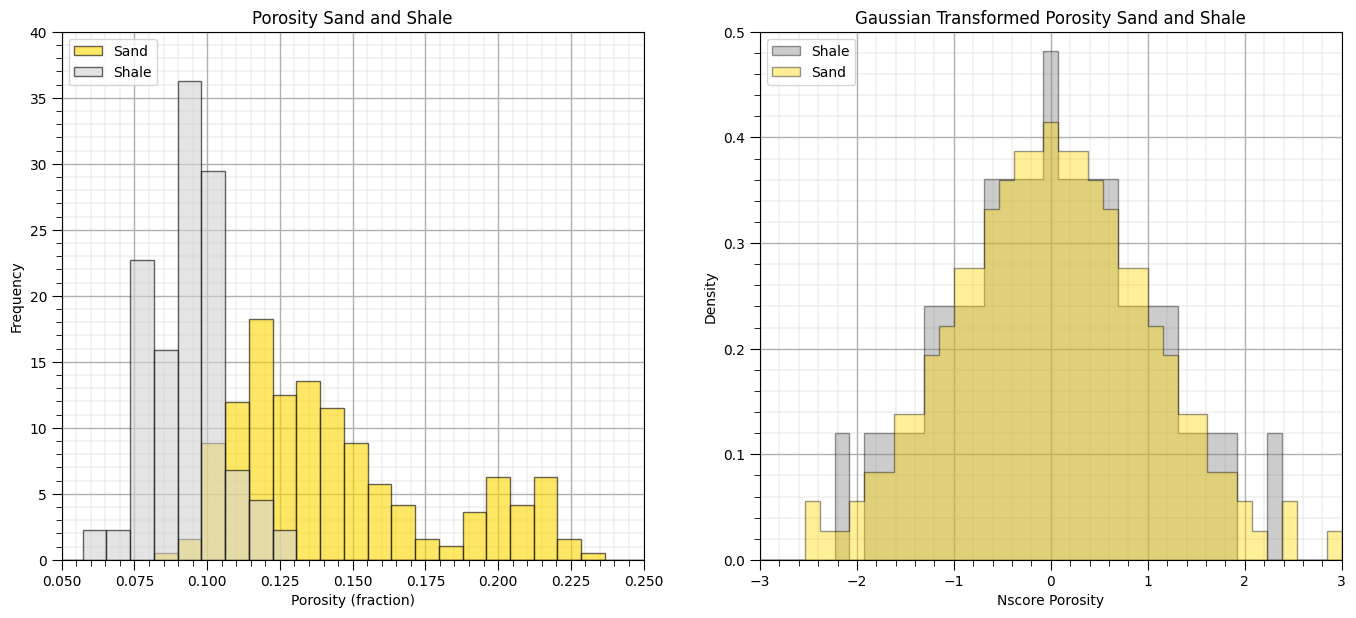

In [61]:
plt.subplot(121)                                              # plot original sand and shale porosity histograms
plt.hist(df_sand['Porosity'], facecolor='gold',bins=np.linspace(0.0,0.4,50),alpha=0.6,density=True,edgecolor='black',
         label='Sand')
plt.hist(df_shale['Porosity'], facecolor='lightgrey',bins=np.linspace(0.0,0.4,50),alpha=0.6,density=True,edgecolor='black',
         label = 'Shale')
plt.xlim([0.05,0.25]); plt.ylim([0,40.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity Sand and Shale')
plt.legend(loc='upper left'); add_grid()

plt.subplot(122)                                              # plot nscore transformed sand and shale histograms
plt.hist(df_shale['NPor'], facecolor='grey',bins=np.linspace(-3.0,3.0,40),histtype="stepfilled",alpha=0.4,density=True,
         cumulative=False,edgecolor='black',label='Shale')
plt.hist(df_sand['NPor'], facecolor='gold',bins=np.linspace(-3.0,3.0,40),histtype="stepfilled",alpha=0.4,density=True,
         cumulative=False,edgecolor='black',label='Sand')
plt.xlim([-3.0,3.0]); plt.ylim([0,0.50])
plt.xlabel('Nscore Porosity'); plt.ylabel('Density'); plt.title('Gaussian Transformed Porosity Sand and Shale')
plt.legend(loc='upper left'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.3); plt.show()

The normal score transform has correctly transformed the porosity over sand and shale facies to standard normal.  Let's plot the location maps of normal score transforms of porosity and permeability for all facies, sand facies and shale facies.

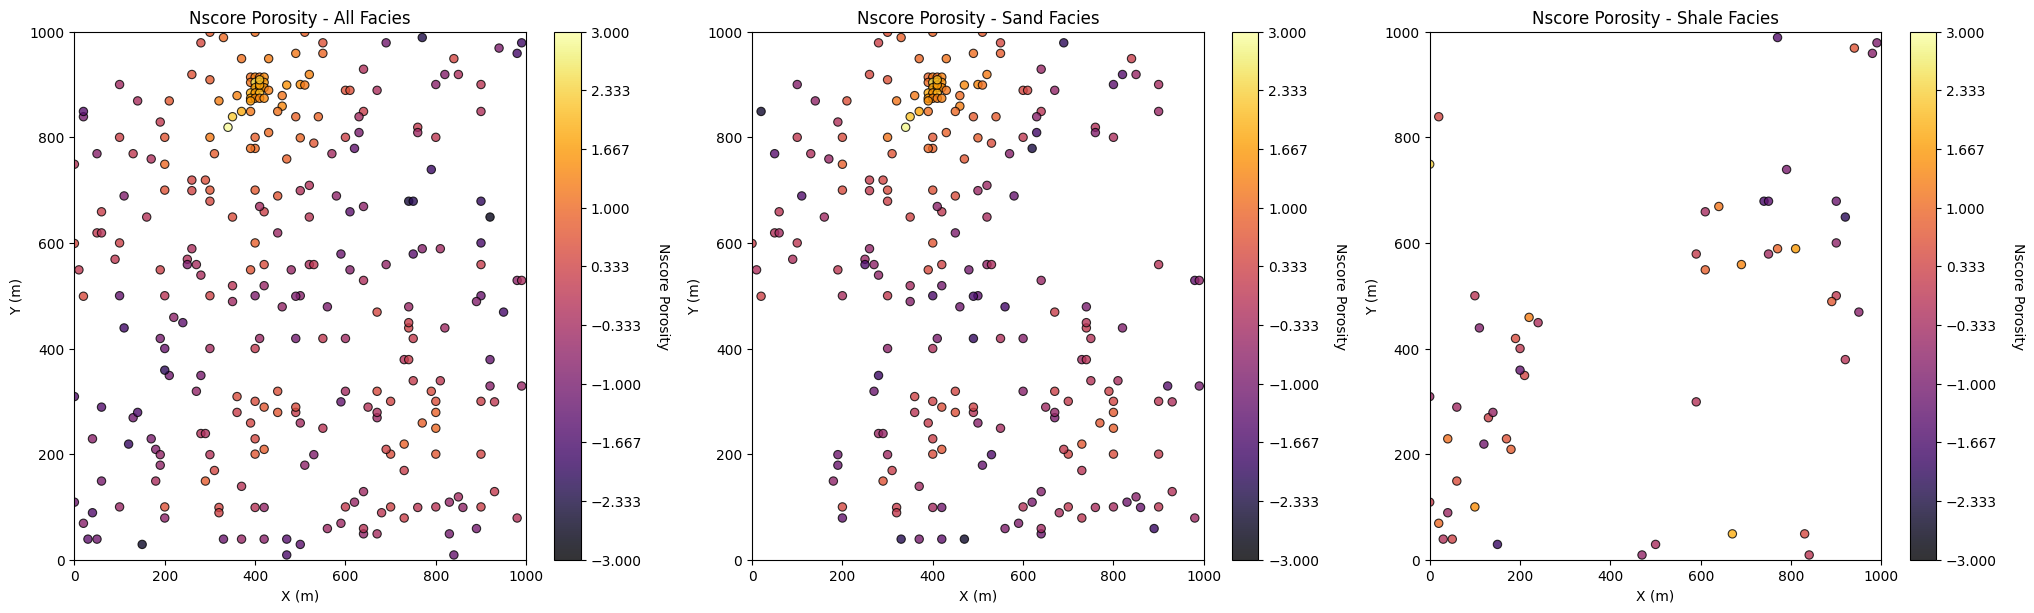

In [48]:
plt.subplot(131)                                              # location map all facies
GSLIB.locmap_st(df,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosity - All Facies','X (m)','Y (m)','Nscore Porosity',cmap)

plt.subplot(132)                                              # location map sand only
GSLIB.locmap_st(df_sand,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosity - Sand Facies','X (m)','Y (m)',
                'Nscore Porosity',cmap)

plt.subplot(133)                                              # location map shale only
GSLIB.locmap_st(df_shale,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosity - Shale Facies','X (m)','Y (m)',
                'Nscore Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.1, wspace=0.2, hspace=0.3); plt.show()

Let's see the parameters for the gamv, irregular data, GeostatsPy's experimental variogram calculation function.

In [13]:
geostats.gamv                                                 # see the input parameters required by the gamv function

<function geostatspy.geostats.gamv(df, xcol, ycol, vcol, tmin, tmax, xlag, xltol, nlag, azm, atol, bandwh, isill)>

We can use the location maps to help determine good variogram calculation parameters.

We are ready to calculate variogram! Let's calculate isotropic variograms for the transformed normal score porosity and permeability for sand, shale and mixed (without separating sand and shale).  Some information on the parameters that I chose:

```p
tmin = -9999.; tmax = 9999.; 
lag_dist = 100.0; lag_tol = 50.0; nlag = 7; bandh = 9999.9; azi = 0; atol = 90.0; isill = 1
```
* tmin, tmax are trimming limits - set to have no impact, no need to filter the data
* lag_dist, lag_tol are the lag distance, lag tolerance - set based on the common data spacing (100m) and tolerance as 100% of lag distance for additonal smoothing
* nlag is number of lags - set to extend just past 50 of the data extent
* bandh is the horizontal band width - set to have no effect
* azi is the azimuth -  it has not effect since we set atol, the azimuth tolerance, to 90.0
* isill is a boolean to standardize the distribution to a variance of 1 - it has no effect since the nscore transform sets the variance to 1.0

Let's try running these variograms and visualizing them.

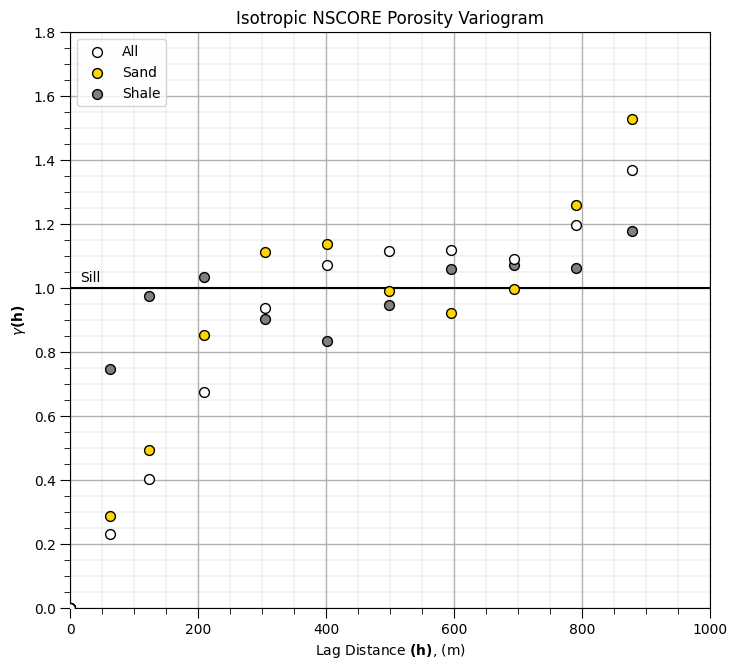

In [60]:
lag_dist = 100.0; lag_tol = 100.0; nlag = 10; bandh = 9999.9; azi = 0; atol = 90.0; isill = 1

lag, por_sand_gamma, por_sand_npair = geostats.gamv(df_sand,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,
            bandh,isill)
lag, por_shale_gamma, por_shale_npair = geostats.gamv(df_shale,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,
            bandh,isill)
lag, por_gamma, por_npair = geostats.gamv(df,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)

plt.subplot(111)
plt.scatter(lag,por_gamma,color = 'white',edgecolor='black',s=50,marker='o',label = 'All',zorder=10)
plt.scatter(lag,por_sand_gamma,color = 'gold',edgecolor='black',s=50,marker='o',label = 'Sand',zorder=9)
plt.scatter(lag,por_shale_gamma,color = 'grey',edgecolor='black',s=50,marker='o',label = 'Shale',zorder=8)
plt.plot([0,2000],[1.0,1.0],color = 'black',zorder=1); plt.annotate('Sill',(15,1.02))
plt.xlabel(r'Lag Distance $\bf(h)$, (m)'); plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Isotropic NSCORE Porosity Variogram')
plt.xlim([0,1000]); plt.ylim([0,1.8]); plt.legend(loc='upper left'); add_grid()


plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

The experimental variograms have some interesting features:

* the range of the sand porosity is greater than the shale porosity range
* although the shale short range experimental points may be noisy due to sparse shale data

#### Comments

This was a basic demonstration of variogram calculation with GeostatsPy. Much more can be done, I have other demonstrations for modeling workflows with GeostatsPy in the GitHub repository [GeostatsPy_Demos](https://github.com/GeostatsGuy/GeostatsPy_Demos/tree/main).

I hope this is helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  
  